## Imorting the libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()
import plotly.express as px
import numpy as np # linear algebra
import pandas as pd
import warnings
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## Description of dataset:
- Dataset Size: 4,117 records with 16 columns.
- Type of Analysis: Multi class classification.
- Imbalance: The dataset is imbalanced, which may require resampling techniques to ensure robust model performance.

## Set some options

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

## Loading the dataset

In [36]:
df=pd.read_csv('Risk New.csv')

In [37]:
df.shape

(4117, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4117 non-null   int64 
 1   AGE              4117 non-null   int64 
 2   INCOME           4117 non-null   int64 
 3   GENDER           4117 non-null   object
 4   MARITAL          4117 non-null   object
 5   NUMKIDS          4117 non-null   int64 
 6   NUMCARDS         4117 non-null   int64 
 7   HOWPAID          4117 non-null   object
 8   EMPLOYED_DAYS    4117 non-null   int64 
 9   STORECAR         4117 non-null   int64 
 10  LOANS            4117 non-null   int64 
 11  LOAN_AMOUNT      4117 non-null   int64 
 12  MORTGAGE         4117 non-null   object
 13  MORTGAGE_AMOUNT  4117 non-null   int64 
 14  CREDIT_SCORE     4117 non-null   object
 15  RISK,            4117 non-null   object
dtypes: int64(10), object(6)
memory usage: 514.8+ KB


In [18]:
df.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,"RISK,"
0,100756,44,59944,m,married,1,2,monthly,6503,2,0,0,y,155000,"0,73",good risk
1,100668,35,59692,m,married,1,1,monthly,5842,1,0,0,y,144000,"0,46",bad loss
2,100418,34,59508,m,married,1,1,monthly,2649,2,1,25370,y,157000,"0,53",good risk
3,100416,34,59463,m,married,0,2,monthly,3423,1,1,28220,y,135000,"0,31",bad loss
4,100590,39,59393,f,married,0,2,monthly,4964,1,0,0,y,145000,"0,81",good risk


## Rename `RISK,` to remove ','

In [38]:
df= df.rename(columns={'RISK,': 'RISK'})

In [5]:
df.columns

Index(['ID', 'AGE', 'INCOME', 'GENDER', 'MARITAL', 'NUMKIDS', 'NUMCARDS',
       'HOWPAID', 'EMPLOYED_DAYS', 'STORECAR', 'LOANS', 'LOAN_AMOUNT',
       'MORTGAGE', 'MORTGAGE_AMOUNT', 'CREDIT_SCORE', 'RISK'],
      dtype='object')

## Number of unique values

In [6]:
df.nunique()

ID                 4117
AGE                  33
INCOME             3675
GENDER                2
MARITAL               3
NUMKIDS               5
NUMCARDS              7
HOWPAID               2
EMPLOYED_DAYS      3144
STORECAR              6
LOANS                 4
LOAN_AMOUNT        1714
MORTGAGE              2
MORTGAGE_AMOUNT     152
CREDIT_SCORE         87
RISK                  3
dtype: int64

In [24]:
df['RISK'].unique()

array(['good risk', 'bad loss', 'bad profit'], dtype=object)

In [53]:
df.RISK.value_counts(True)

RISK
bad profit    0.584649
bad loss      0.220063
good risk     0.195288
Name: proportion, dtype: float64

In [5]:
df.GENDER.unique()

array(['m', 'f'], dtype=object)

In [6]:
df.MARITAL.unique()

array(['married', 'single', 'divsepwid'], dtype=object)

In [7]:
df.HOWPAID.unique()

array(['monthly', 'weekly'], dtype=object)

In [9]:
df.MORTGAGE.unique()

array(['y', 'n'], dtype=object)

In [59]:
df.CREDIT_SCORE.nunique()

87

In [60]:
df.CREDIT_SCORE.unique()

array(['0,73', '0,46', '0,53', '0,31', '0,81', '0,56', '0,63', '0,39',
       '0,67', '0,51', '0,13', '0,66', '0,47', '0,62', '0,27', '0,68',
       '0,25', '0,38', '0,55', '0,44', '0,85', '0,57', '0,37', '0,28',
       '0,23', '0,52', '0,49', '0,42', '0,69', '0,75', '0,65', '0,54',
       '0,40', '0,76', '0,64', '0,79', '0,45', '0,80', '0,91', '0,60',
       '0,14', '0,61', '0,72', '0,59', '0,77', '0,86', '0,34', '0,18',
       '0,32', '0,82', '0,48', '0,71', '0,94', '0,50', '0,29', '0,58',
       '0,35', '0,21', '0,84', '0,36', '0,11', '0,83', '0,74', '0,78',
       '0,43', '0,24', '0,87', '0,70', '0,41', '0,16', '0,12', '0,88',
       '0,19', '0,89', '0,30', '0,15', '0,33', '0,92', '0,20', '0,26',
       '0,90', '0,97', '0,17', '0,22', '0,10', '0,98', '0,93'],
      dtype=object)

### Replace the ',' with '.' to make our data accurate

In [39]:
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].astype(str).str.replace(',','.')

In [40]:
df.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,RISK
0,100756,44,59944,m,married,1,2,monthly,6503,2,0,0,y,155000,0.73,good risk
1,100668,35,59692,m,married,1,1,monthly,5842,1,0,0,y,144000,0.46,bad loss
2,100418,34,59508,m,married,1,1,monthly,2649,2,1,25370,y,157000,0.53,good risk
3,100416,34,59463,m,married,0,2,monthly,3423,1,1,28220,y,135000,0.31,bad loss
4,100590,39,59393,f,married,0,2,monthly,4964,1,0,0,y,145000,0.81,good risk


In [7]:
df.CREDIT_SCORE.unique()

array(['0.73', '0.46', '0.53', '0.31', '0.81', '0.56', '0.63', '0.39',
       '0.67', '0.51', '0.13', '0.66', '0.47', '0.62', '0.27', '0.68',
       '0.25', '0.38', '0.55', '0.44', '0.85', '0.57', '0.37', '0.28',
       '0.23', '0.52', '0.49', '0.42', '0.69', '0.75', '0.65', '0.54',
       '0.40', '0.76', '0.64', '0.79', '0.45', '0.80', '0.91', '0.60',
       '0.14', '0.61', '0.72', '0.59', '0.77', '0.86', '0.34', '0.18',
       '0.32', '0.82', '0.48', '0.71', '0.94', '0.50', '0.29', '0.58',
       '0.35', '0.21', '0.84', '0.36', '0.11', '0.83', '0.74', '0.78',
       '0.43', '0.24', '0.87', '0.70', '0.41', '0.16', '0.12', '0.88',
       '0.19', '0.89', '0.30', '0.15', '0.33', '0.92', '0.20', '0.26',
       '0.90', '0.97', '0.17', '0.22', '0.10', '0.98', '0.93'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4117 non-null   int64 
 1   AGE              4117 non-null   int64 
 2   INCOME           4117 non-null   int64 
 3   GENDER           4117 non-null   object
 4   MARITAL          4117 non-null   object
 5   NUMKIDS          4117 non-null   int64 
 6   NUMCARDS         4117 non-null   int64 
 7   HOWPAID          4117 non-null   object
 8   EMPLOYED_DAYS    4117 non-null   int64 
 9   STORECAR         4117 non-null   int64 
 10  LOANS            4117 non-null   int64 
 11  LOAN_AMOUNT      4117 non-null   int64 
 12  MORTGAGE         4117 non-null   object
 13  MORTGAGE_AMOUNT  4117 non-null   int64 
 14  CREDIT_SCORE     4117 non-null   object
 15  RISK             4117 non-null   object
dtypes: int64(10), object(6)
memory usage: 514.8+ KB


In [41]:
# converting its data type into numeric
df['CREDIT_SCORE'] = pd.to_numeric(df['CREDIT_SCORE'])

## Checking the null values

In [14]:
df.isnull().sum()

ID                 0
AGE                0
INCOME             0
GENDER             0
MARITAL            0
NUMKIDS            0
NUMCARDS           0
HOWPAID            0
EMPLOYED_DAYS      0
STORECAR           0
LOANS              0
LOAN_AMOUNT        0
MORTGAGE           0
MORTGAGE_AMOUNT    0
CREDIT_SCORE       0
RISK,              0
dtype: int64

## outliers detection

In [42]:
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(exclude='number')

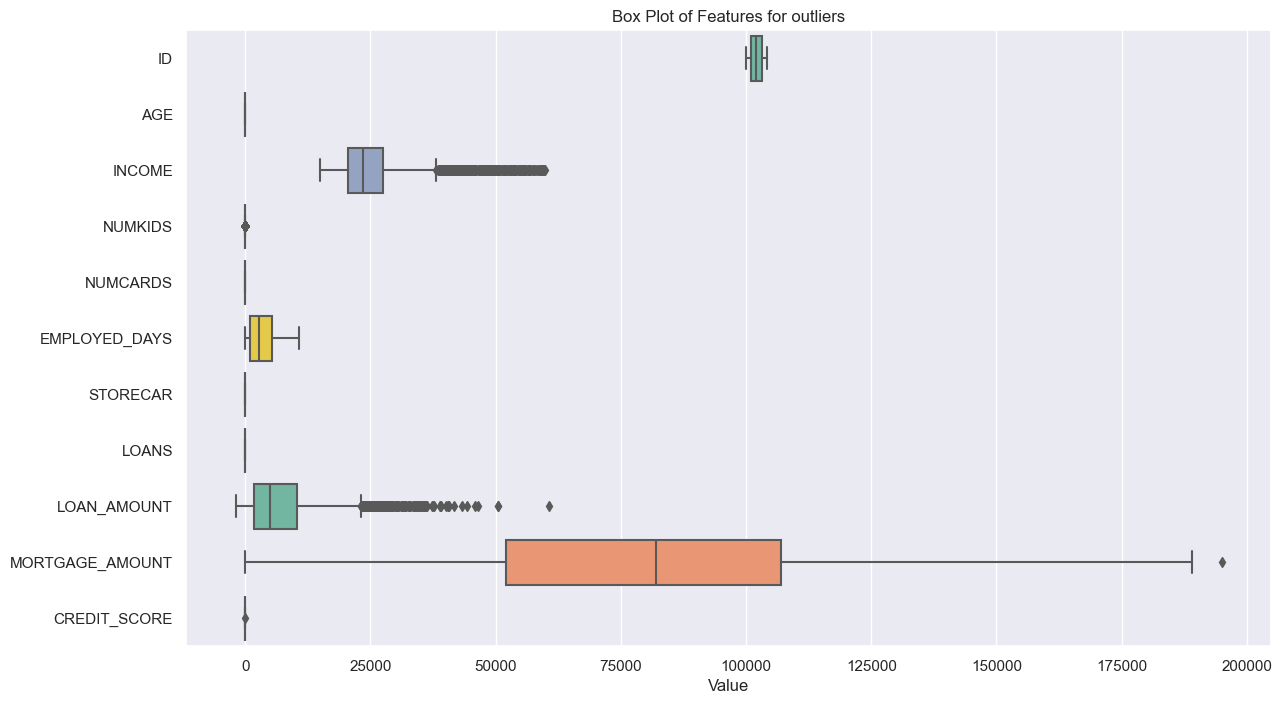

<Figure size 640x480 with 0 Axes>

In [65]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=num_col,orient='h',palette='Set2')
plt.title("Box Plot of Features for outliers")
plt.xlabel("Value")
plt.show()
plt.tight_layout()

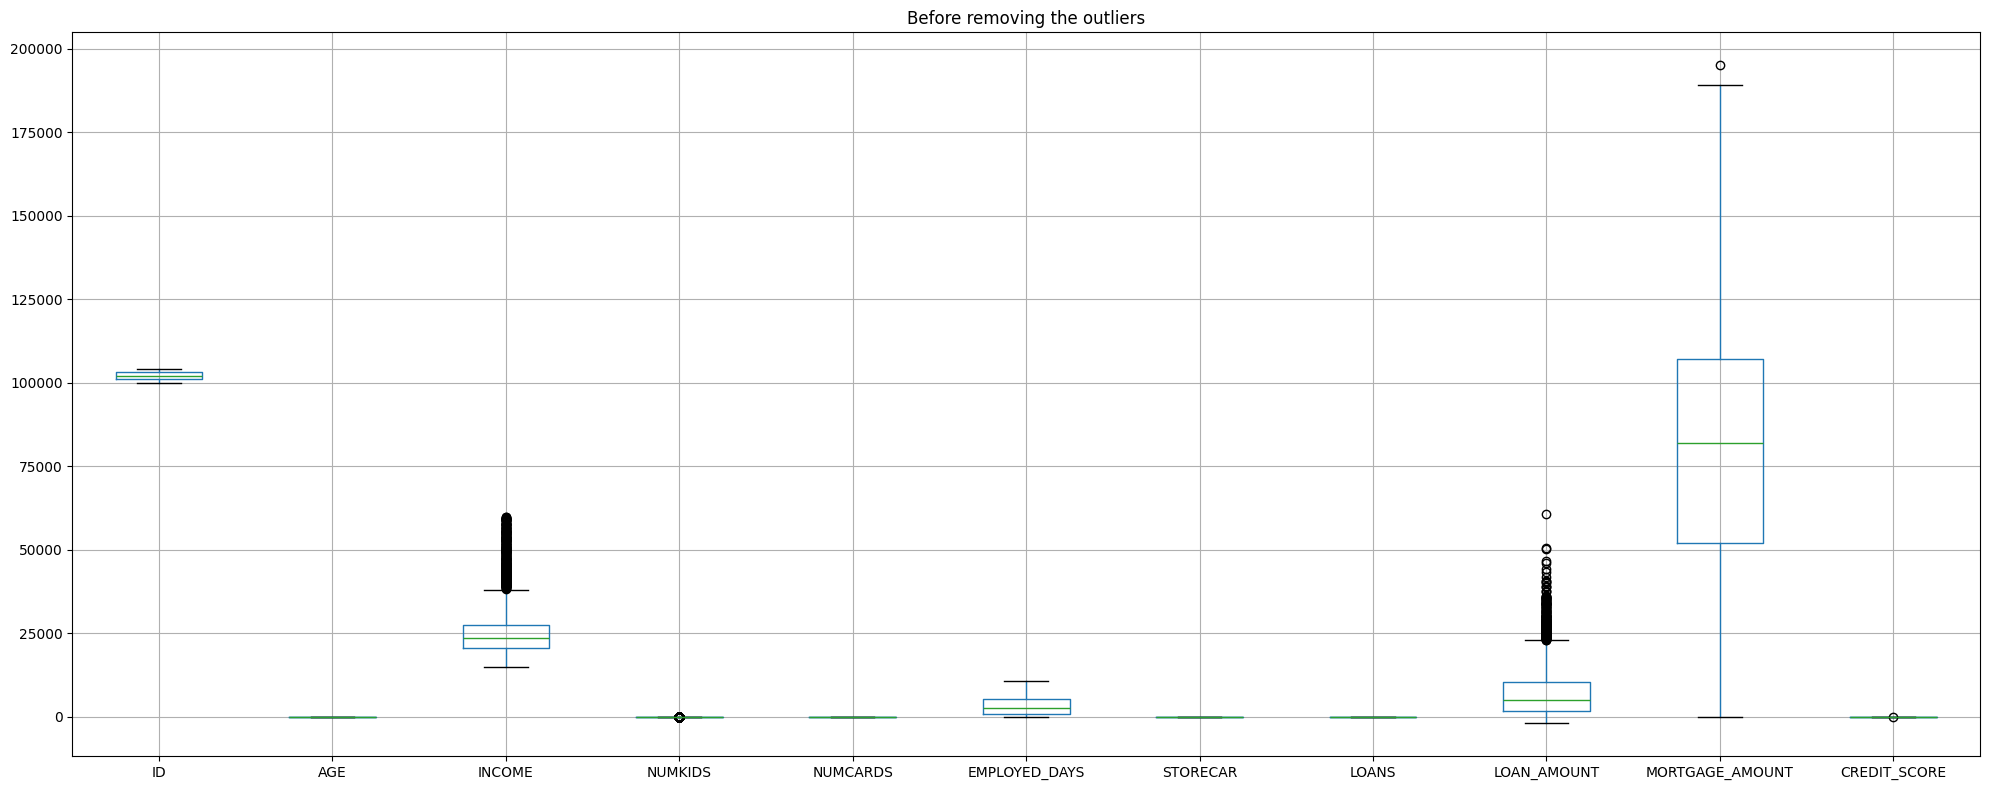

In [10]:
plt.figure(figsize=(20,8))
num_col.boxplot()
plt.title("Before removing the outliers")
plt.tight_layout()
plt.show()

## Removing the outlier by Interqurtile Range method

In [43]:
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_data = num_col.clip(lower=lower_bound,upper=upper_bound,axis=1)

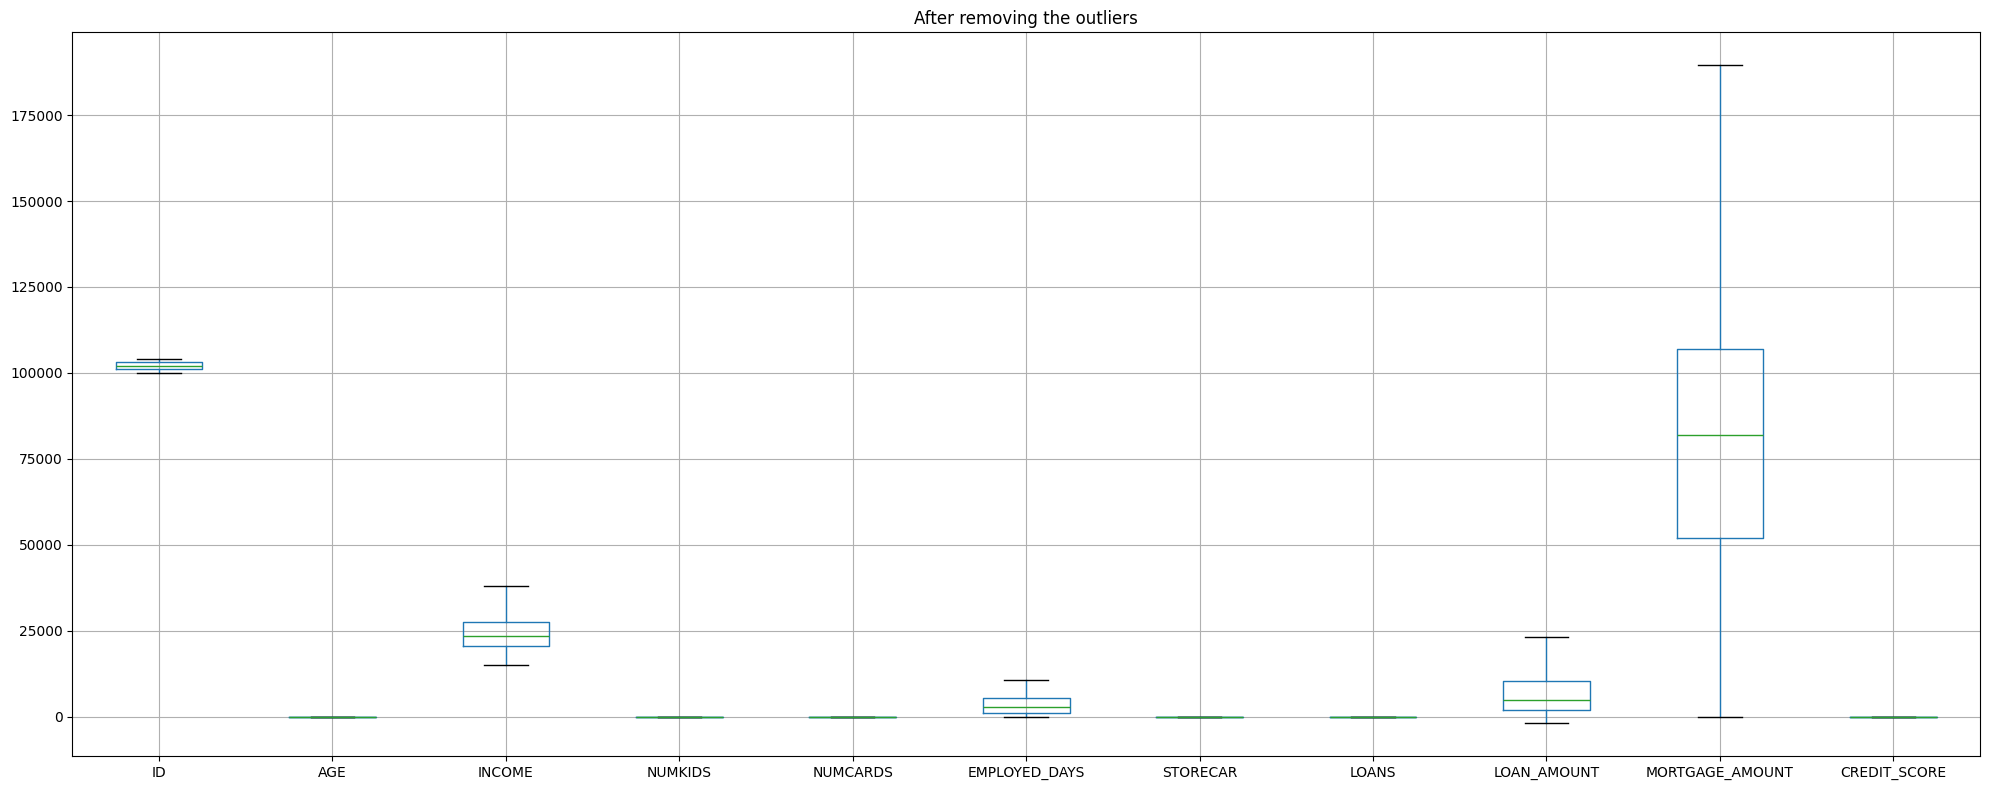

In [44]:
plt.figure(figsize=(20,8))
cleaned_data.boxplot()
plt.title("After removing the outliers")
plt.tight_layout()
plt.show()

In [45]:
cleaned_data.shape

(4117, 11)

In [46]:
datafrmes_concat = [cleaned_data,cat_col]
df = pd.concat(datafrmes_concat,axis=1)

In [14]:
sns.set(style='whitegrid')

### count plot for RISK

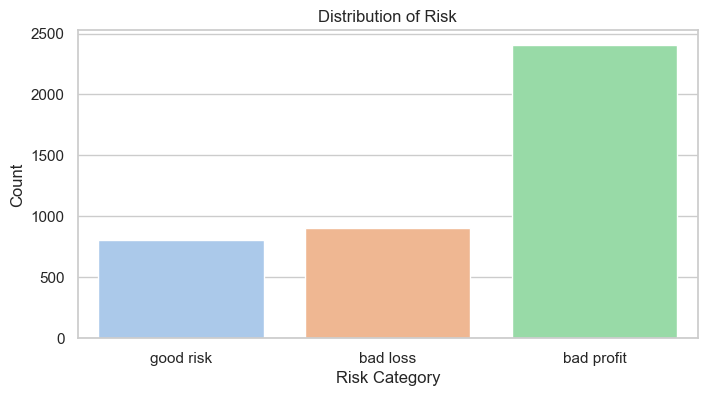

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='RISK',palette='pastel')
plt.title('Distribution of Risk')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

### Count plot for all categorical features by `RISK`

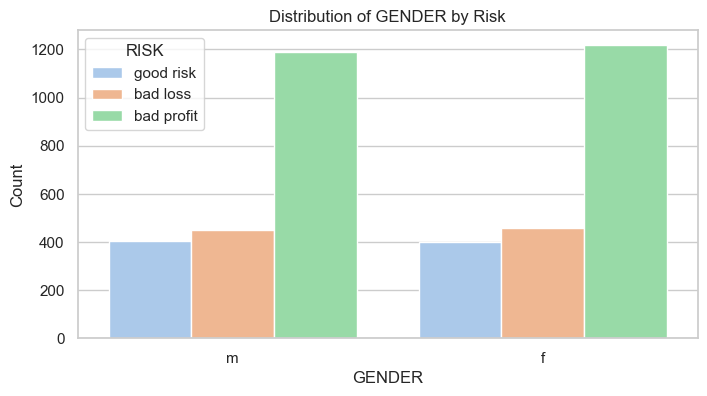

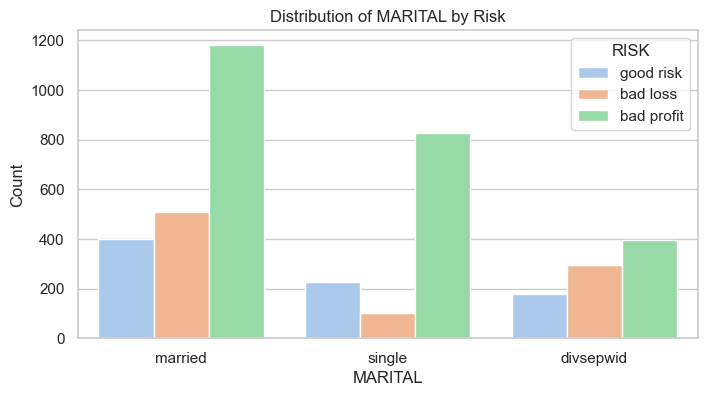

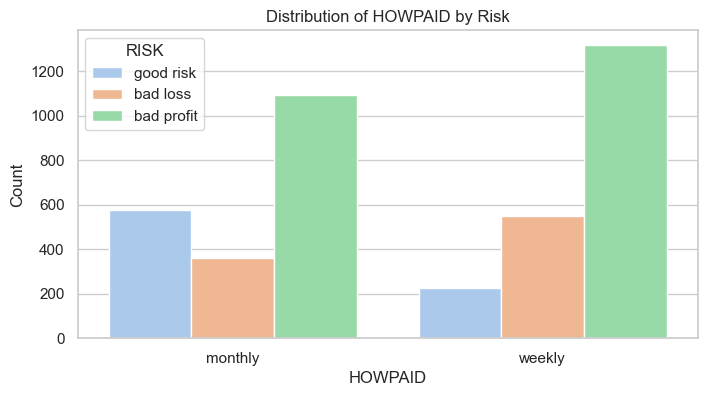

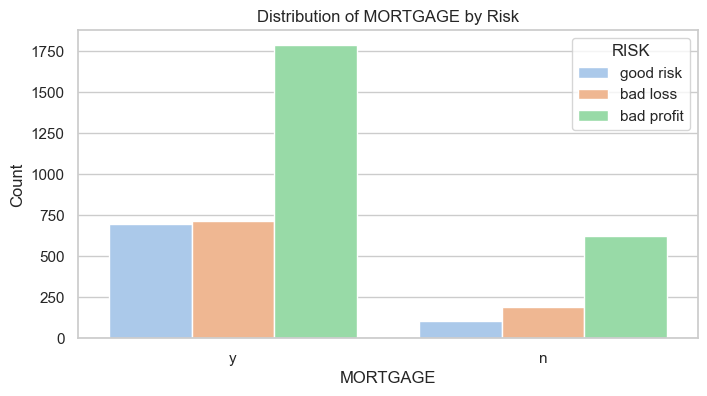

In [49]:
sns.set(style="whitegrid")

# List of categorical features
categorical_features = ['GENDER', 'MARITAL', 'HOWPAID', 'MORTGAGE']
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='RISK', palette='pastel')
    plt.title(f'Distribution of {col} by Risk')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='RISK')
    plt.show()

### Hist plot of numerical features by Risk

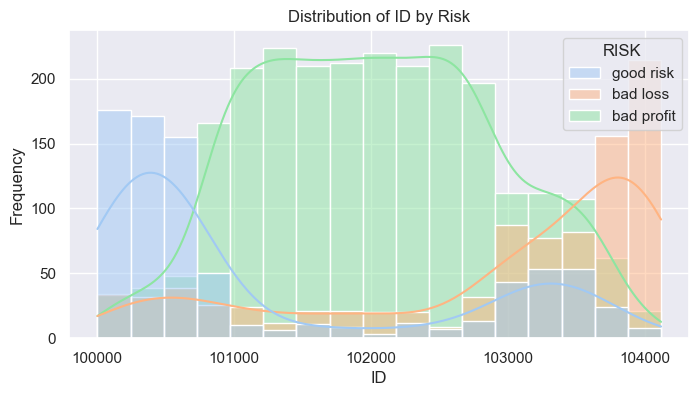

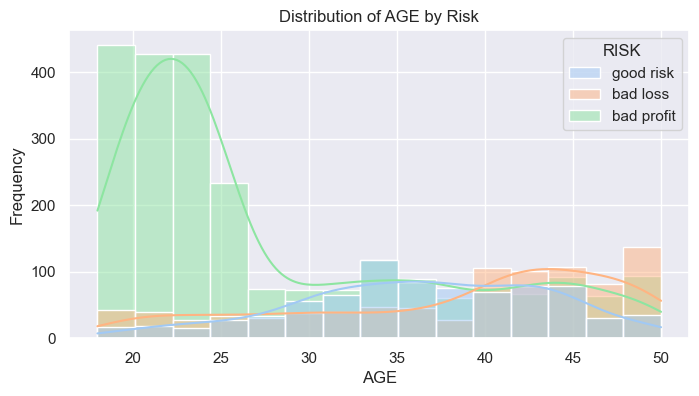

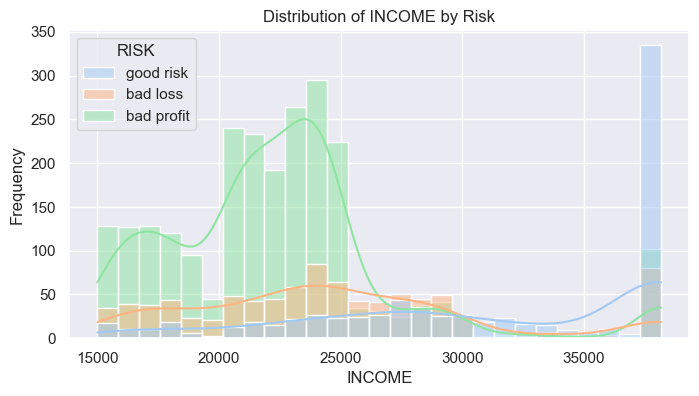

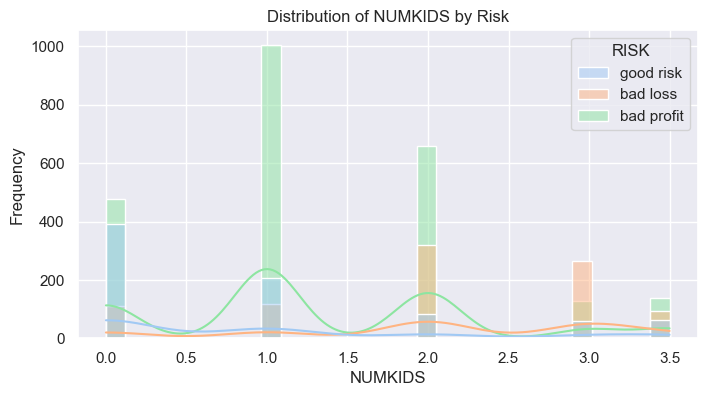

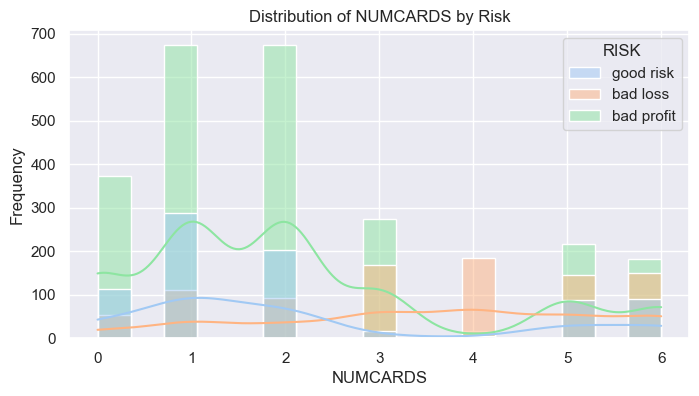

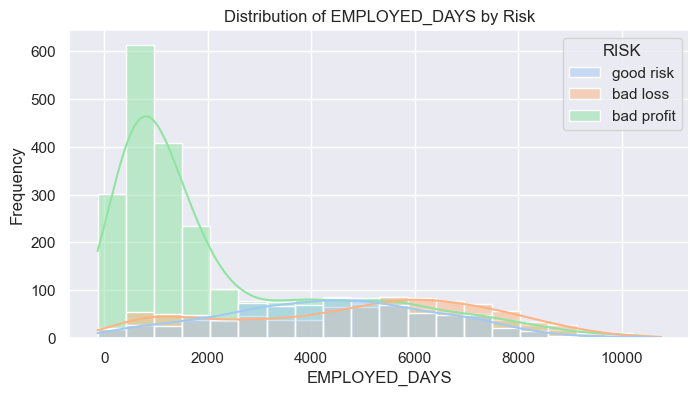

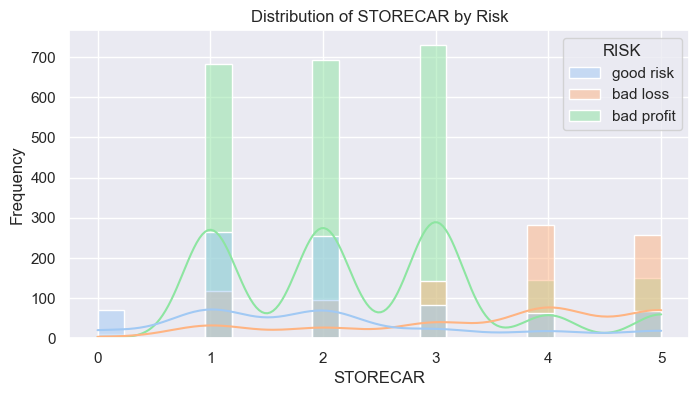

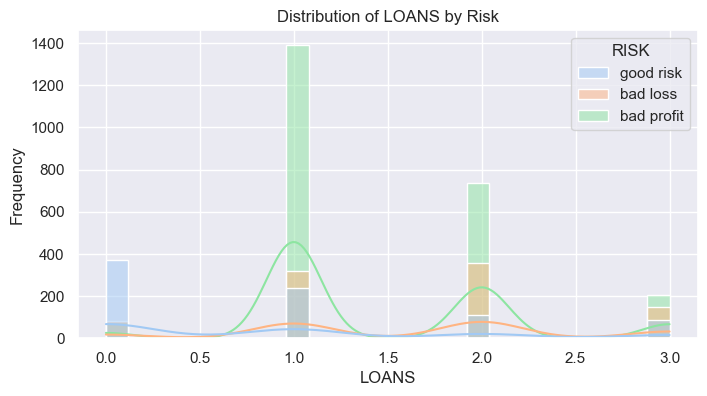

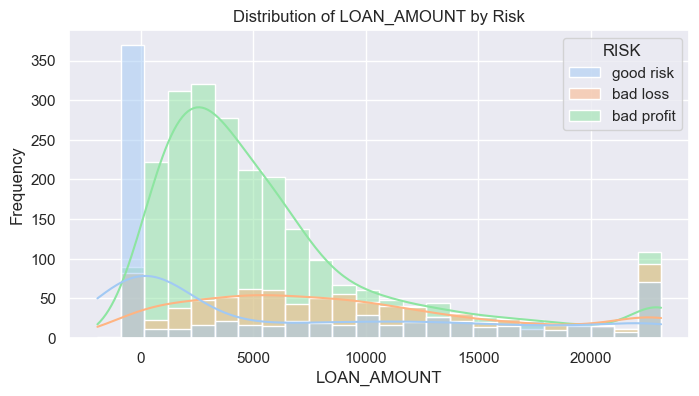

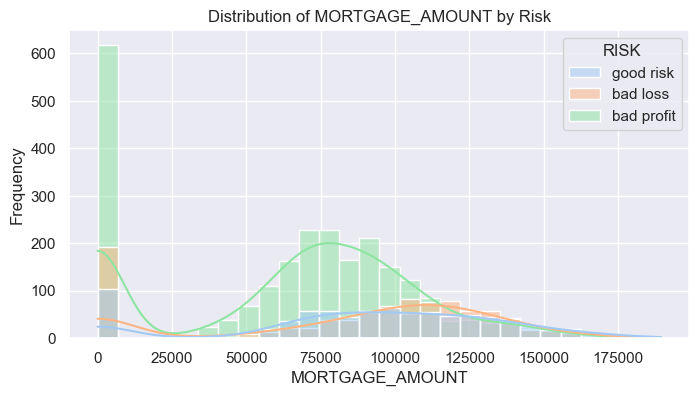

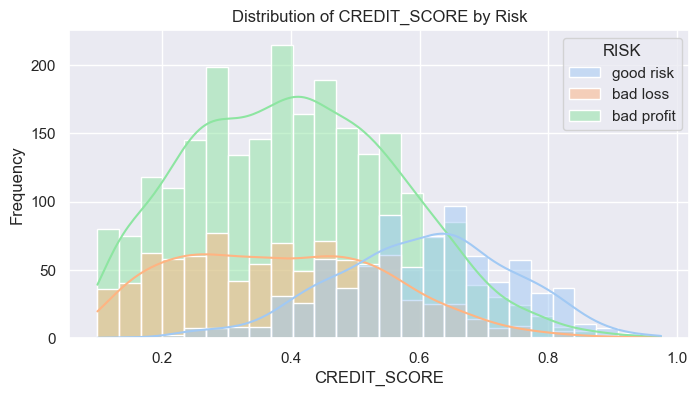

In [47]:
sns.set(style="darkgrid")

# List of numerical features

num_col = ['ID', 'AGE', 'INCOME', 'NUMKIDS', 'NUMCARDS', 'EMPLOYED_DAYS',
    'STORECAR', 'LOANS', 'LOAN_AMOUNT', 'MORTGAGE_AMOUNT', 'CREDIT_SCORE']

for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, hue='RISK', palette='pastel',kde=True)
    plt.title(f'Distribution of {col} by Risk')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

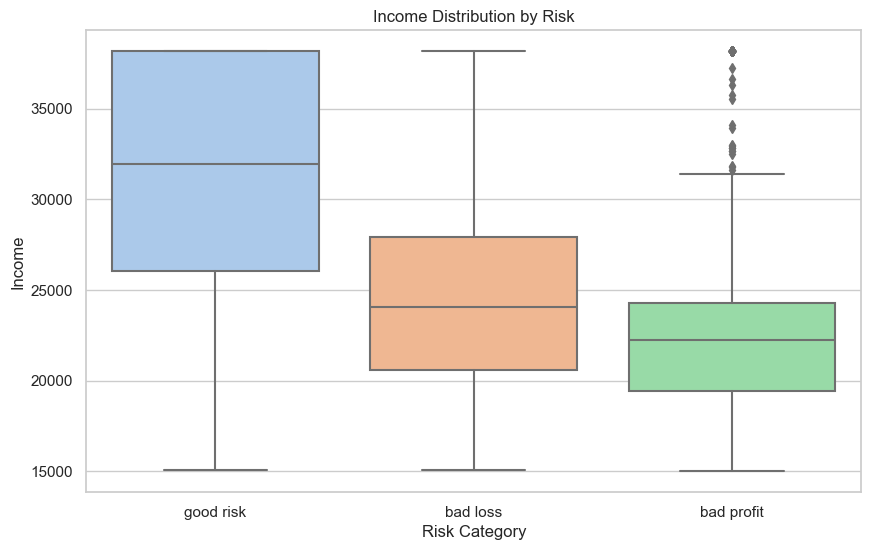

In [45]:
# 4. Box Plot for Income by Risk
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='RISK', y='INCOME', palette='pastel')
plt.title('Income Distribution by Risk')
plt.xlabel('Risk Category')
plt.ylabel('Income')
plt.show()

### Pair plot for numerical feature

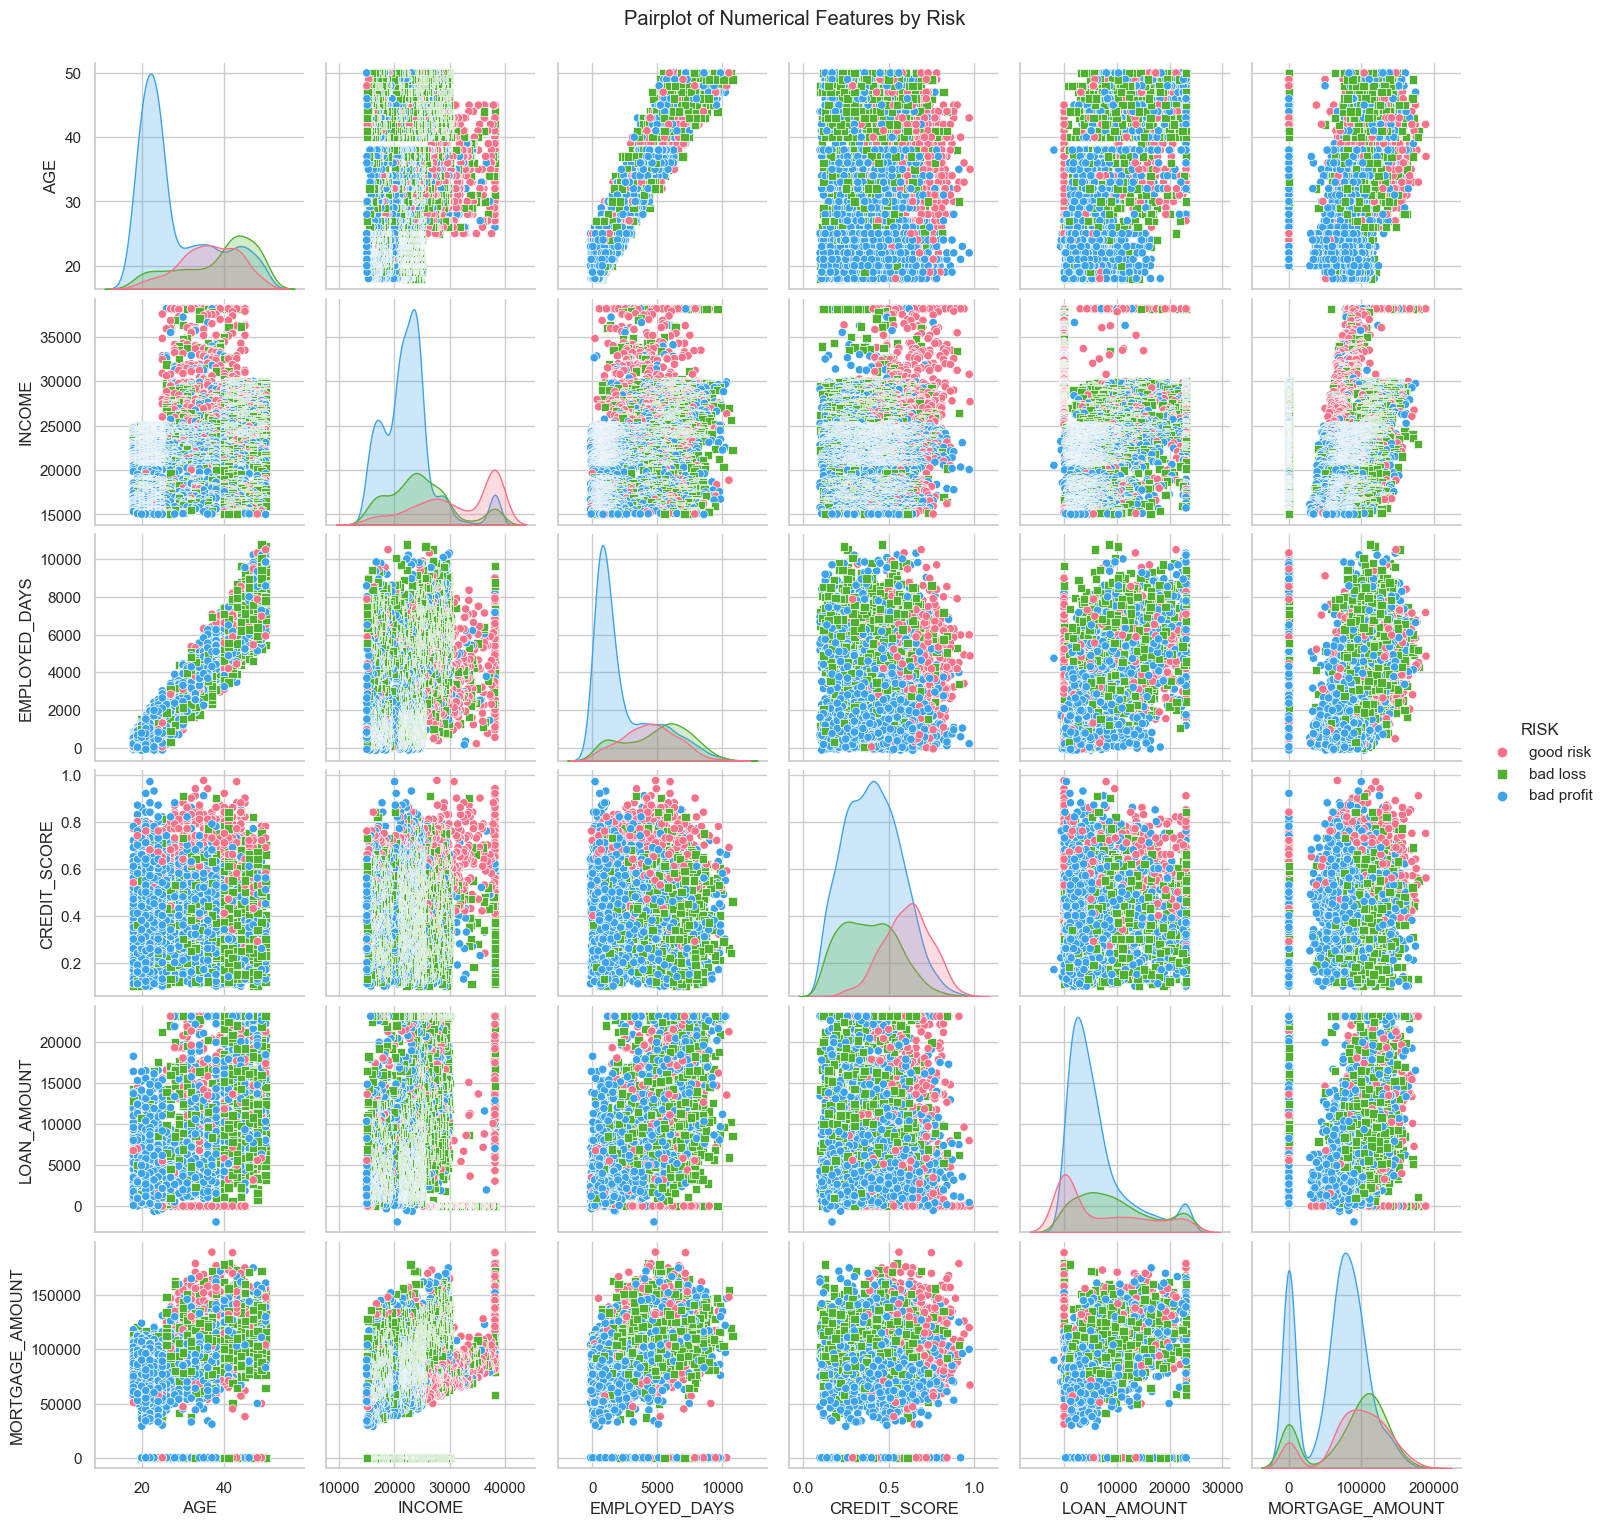

In [46]:
numerical_features = ['AGE', 'INCOME', 'EMPLOYED_DAYS', 'CREDIT_SCORE', 'LOAN_AMOUNT', 'MORTGAGE_AMOUNT']
sns.pairplot(df, vars=numerical_features, hue='RISK', palette='husl', markers=['o', 's'])
plt.suptitle('Pairplot of Numerical Features by Risk', y=1.02)
plt.show()

### Dropping the some columns

In [50]:
df.drop(columns=['ID'],inplace=True)

In [51]:
df.drop(columns=['GENDER'],inplace=True)

In [ ]:
import plotly.express as px

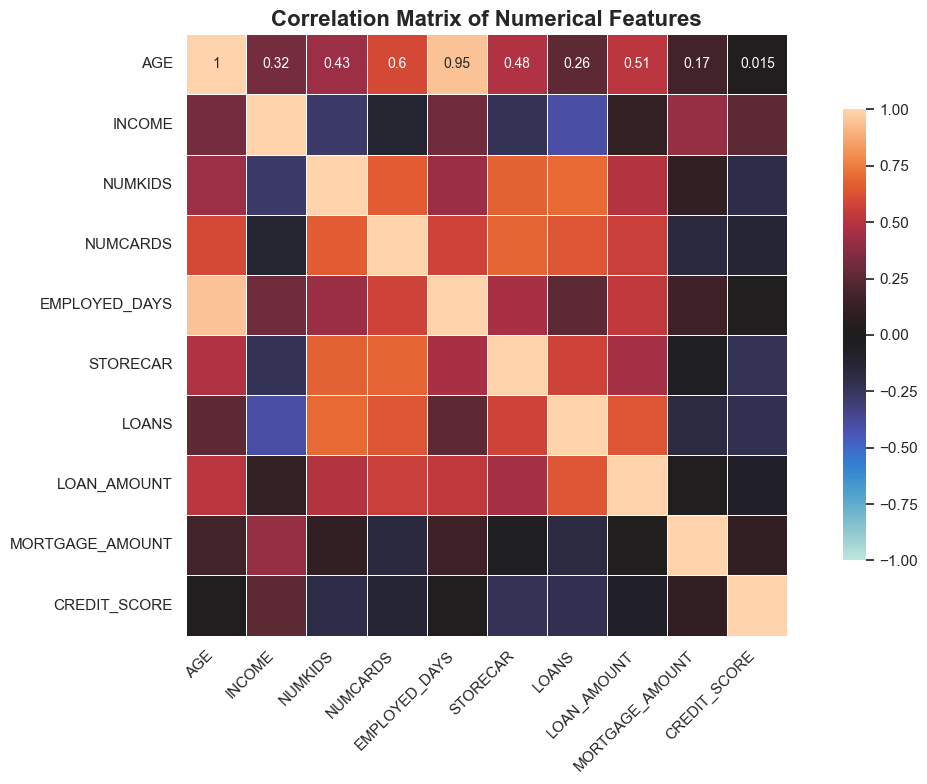

In [52]:
num_col = ['AGE', 'INCOME', 'NUMKIDS', 'NUMCARDS', 'EMPLOYED_DAYS',
    'STORECAR', 'LOANS', 'LOAN_AMOUNT', 'MORTGAGE_AMOUNT', 'CREDIT_SCORE']
corr = df[num_col].corr()
# Set up the matplotlib figure
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True,
            vmax=1, vmin=-1, center=0, square=True, linewidths=.5, 
            cbar_kws={"shrink": .75}, annot_kws={"size": 10})

# Customize the plot
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

In [28]:
import plotly.express as px

In [53]:
num_col = ['AGE', 'INCOME', 'NUMKIDS', 'NUMCARDS', 'EMPLOYED_DAYS',
    'STORECAR', 'LOANS', 'LOAN_AMOUNT', 'MORTGAGE_AMOUNT', 'CREDIT_SCORE']
corr = df[num_col].corr()

# Create a heatmap using Plotly Express
fig = px.imshow(corr,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=num_col,
                y=num_col,
                color_continuous_scale=px.colors.diverging.Tealrose,
                zmin=-1, zmax=1,
                title="Correlation Matrix of Numerical Features")

# Update layout for better appearance
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='darkblue'),
    xaxis_title="",
    yaxis_title="",
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0),
    font=dict(family="Arial", size=12, color="black"),
    coloraxis_colorbar=dict(
        title="Correlation Coefficient",
        thickness=15,
        len=0.75,
        xpad=10
    )
)

In [54]:
df.shape

(4117, 14)

### Apply lable encoding on the categorical features

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              4117 non-null   int64  
 1   INCOME           4117 non-null   float64
 2   NUMKIDS          4117 non-null   float64
 3   NUMCARDS         4117 non-null   int64  
 4   EMPLOYED_DAYS    4117 non-null   int64  
 5   STORECAR         4117 non-null   int64  
 6   LOANS            4117 non-null   int64  
 7   LOAN_AMOUNT      4117 non-null   int64  
 8   MORTGAGE_AMOUNT  4117 non-null   int64  
 9   CREDIT_SCORE     4117 non-null   float64
 10  MARITAL          4117 non-null   object 
 11  HOWPAID          4117 non-null   object 
 12  MORTGAGE         4117 non-null   object 
 13  RISK             4117 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 450.4+ KB


In [55]:
mapping = {}
cat_col = ['RISK','MARITAL','MORTGAGE','HOWPAID']
for col in cat_col:
    le = LabelEncoder()
    # fit and transform the column
    df[col] = le.fit_transform(df[col])
    # store the mapping for each column
    mapping[col] = dict(zip(le.classes_,le.transform(le.classes_)))

for feature,mappin in mapping.items():
    print(f"{feature} : {mapping}")

RISK : {'RISK': {'bad loss': 0, 'bad profit': 1, 'good risk': 2}, 'MARITAL': {'divsepwid': 0, 'married': 1, 'single': 2}, 'MORTGAGE': {'n': 0, 'y': 1}, 'HOWPAID': {'monthly': 0, 'weekly': 1}}
MARITAL : {'RISK': {'bad loss': 0, 'bad profit': 1, 'good risk': 2}, 'MARITAL': {'divsepwid': 0, 'married': 1, 'single': 2}, 'MORTGAGE': {'n': 0, 'y': 1}, 'HOWPAID': {'monthly': 0, 'weekly': 1}}
MORTGAGE : {'RISK': {'bad loss': 0, 'bad profit': 1, 'good risk': 2}, 'MARITAL': {'divsepwid': 0, 'married': 1, 'single': 2}, 'MORTGAGE': {'n': 0, 'y': 1}, 'HOWPAID': {'monthly': 0, 'weekly': 1}}
HOWPAID : {'RISK': {'bad loss': 0, 'bad profit': 1, 'good risk': 2}, 'MARITAL': {'divsepwid': 0, 'married': 1, 'single': 2}, 'MORTGAGE': {'n': 0, 'y': 1}, 'HOWPAID': {'monthly': 0, 'weekly': 1}}


In [56]:
df.head()

,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE,MARITAL,HOWPAID,MORTGAGE,RISK
0,44,38169.5,1.0,2,6503,2,0,0,155000,0.73,1,0,1,2
1,35,38169.5,1.0,1,5842,1,0,0,144000,0.46,1,0,1,0
2,34,38169.5,1.0,1,2649,2,1,23125,157000,0.53,1,0,1,2
3,34,38169.5,0.0,2,3423,1,1,23125,135000,0.31,1,0,1,0
4,39,38169.5,0.0,2,4964,1,0,0,145000,0.81,1,0,1,2


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              4117 non-null   int64  
 1   INCOME           4117 non-null   float64
 2   NUMKIDS          4117 non-null   float64
 3   NUMCARDS         4117 non-null   int64  
 4   EMPLOYED_DAYS    4117 non-null   int64  
 5   STORECAR         4117 non-null   int64  
 6   LOANS            4117 non-null   int64  
 7   LOAN_AMOUNT      4117 non-null   int64  
 8   MORTGAGE_AMOUNT  4117 non-null   int64  
 9   CREDIT_SCORE     4117 non-null   float64
 10  MARITAL          4117 non-null   int32  
 11  HOWPAID          4117 non-null   int32  
 12  MORTGAGE         4117 non-null   int32  
 13  RISK             4117 non-null   int32  
dtypes: float64(3), int32(4), int64(7)
memory usage: 386.1 KB


## Dataset separation

In [57]:
x = df.drop('RISK',axis=1)
y = df['RISK']

In [58]:
y.value_counts(True)

RISK
1    0.584649
0    0.220063
2    0.195288
Name: proportion, dtype: float64

### Balancing the dataset for good performance of the model

In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)
x_resampled,y_resampled = smote.fit_resample(x,y)
# Convert resampled arrays back to DataFrame for easier plotting
df_resampled = pd.DataFrame(x_resampled)
df_resampled['RISK'] = y_resampled

In [60]:
x_resampled.shape,y_resampled.shape

((7221, 13), (7221,))

In [61]:
y_resampled.value_counts(True)

RISK
2    0.333333
0    0.333333
1    0.333333
Name: proportion, dtype: float64

In [93]:
x_resampled.head()

,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE,MARITAL,HOWPAID,MORTGAGE
0,44,38169.5,1.0,2,6503,2,0,0,155000,0.73,1,0,1
1,35,38169.5,1.0,1,5842,1,0,0,144000,0.46,1,0,1
2,34,38169.5,1.0,1,2649,2,1,23125,157000,0.53,1,0,1
3,34,38169.5,0.0,2,3423,1,1,23125,135000,0.31,1,0,1
4,39,38169.5,0.0,2,4964,1,0,0,145000,0.81,1,0,1


## Plotting after balancing the data

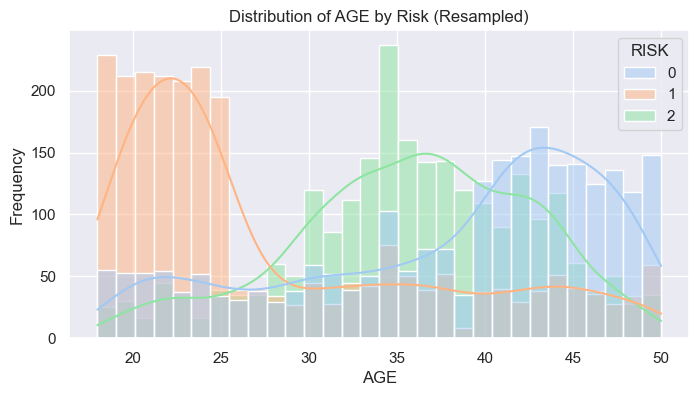

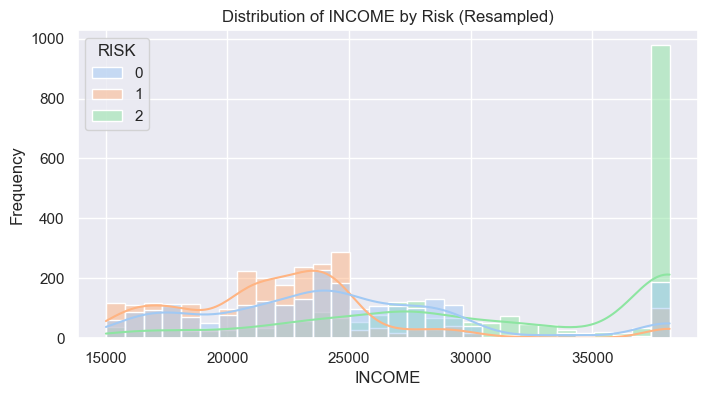

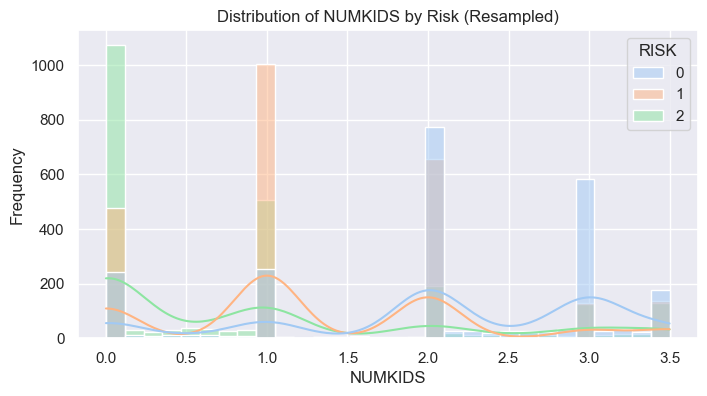

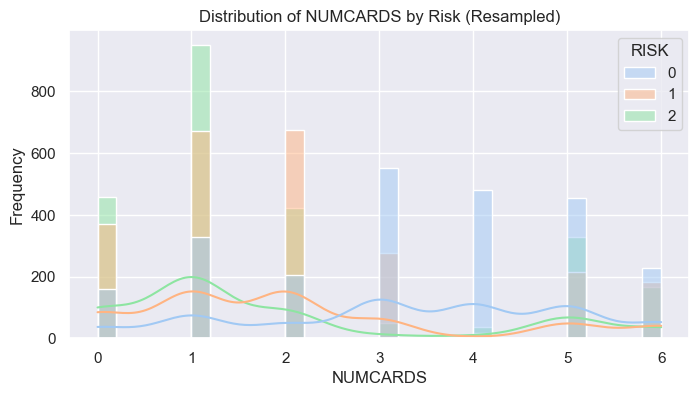

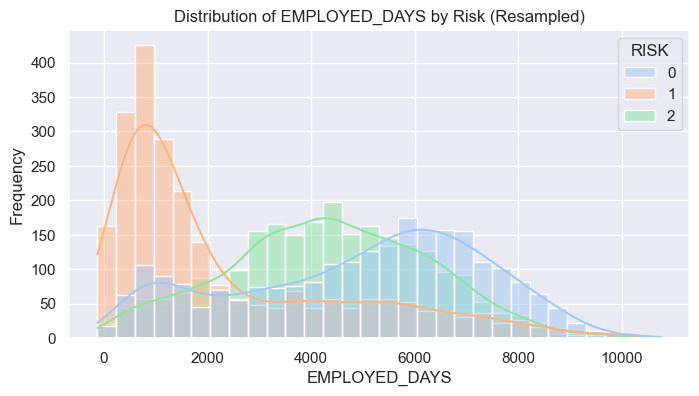

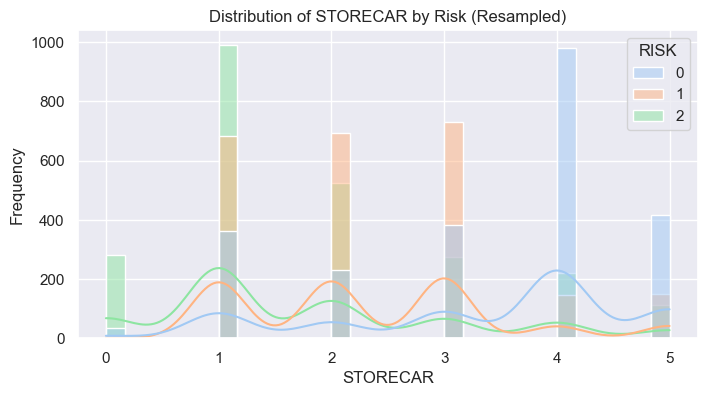

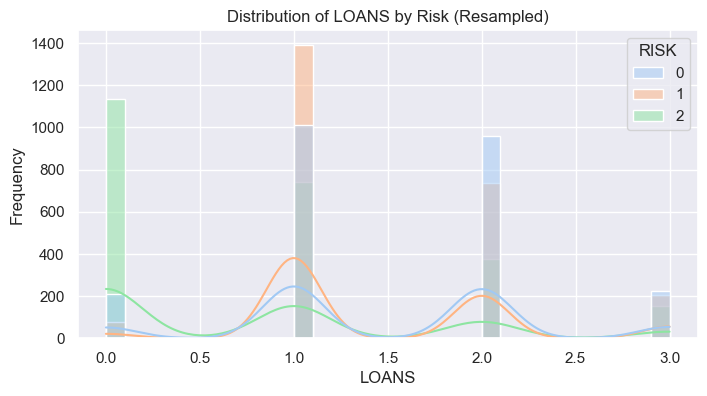

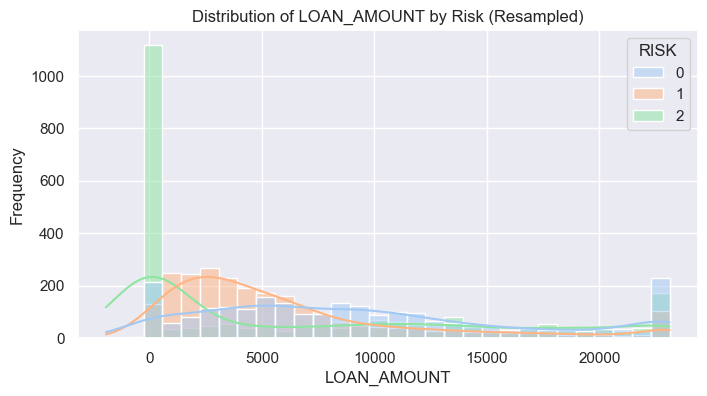

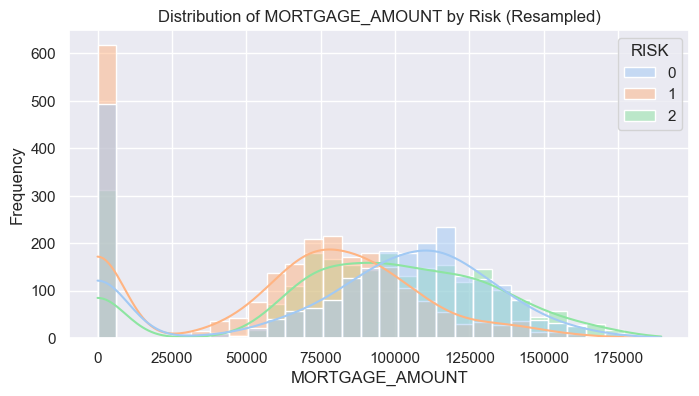

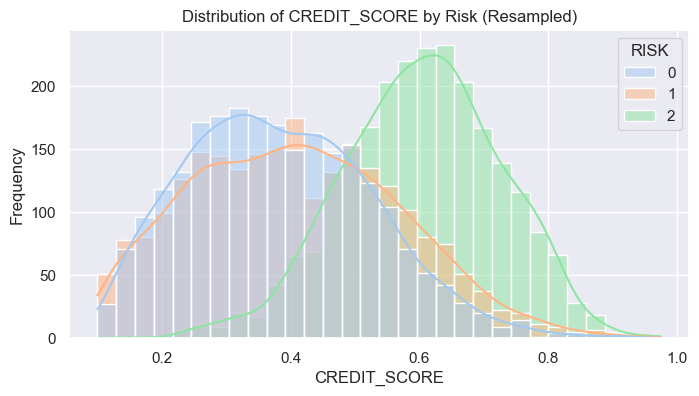

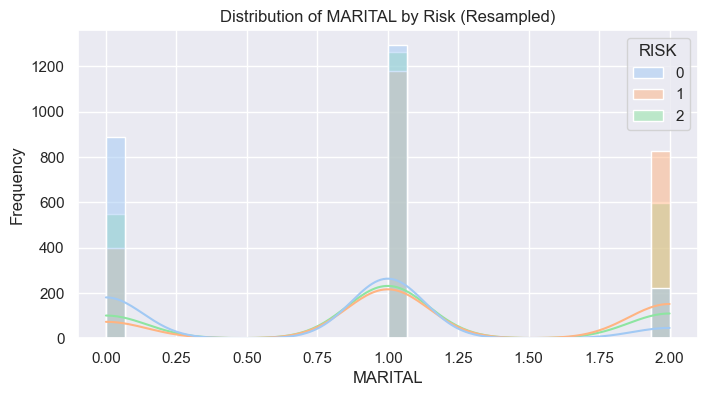

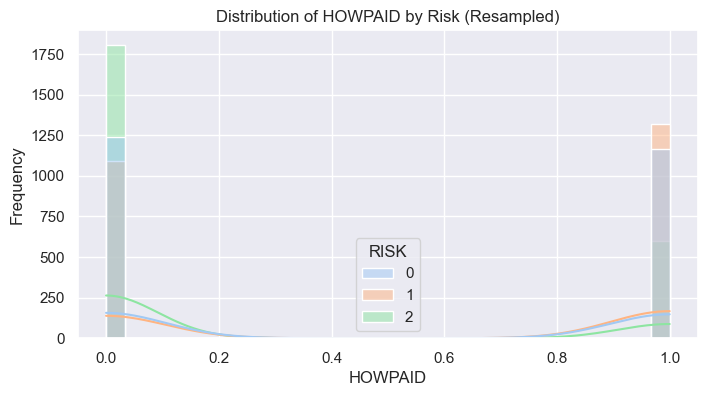

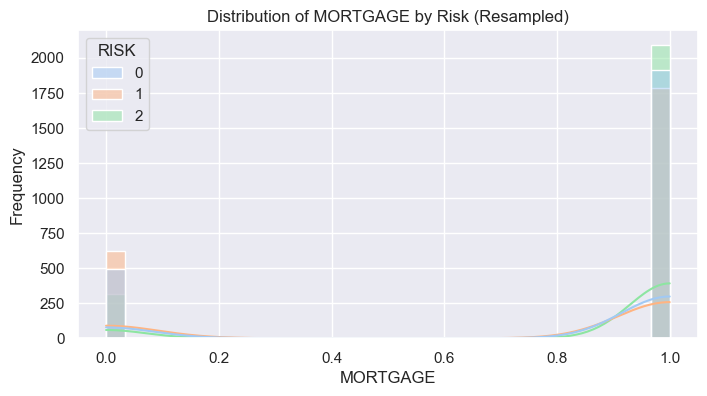

In [97]:
sns.set(style="darkgrid")

# List of numerical features


for col in x_resampled:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_resampled, x=col, hue='RISK', palette='pastel',bins=30,kde=True)
    plt.title(f'Distribution of {col} by Risk (Resampled)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

### Scalling the data

In [62]:
mc = MinMaxScaler()
x_scaled = mc.fit_transform(x_resampled)
x_resampled = pd.DataFrame(x_scaled,columns=x_resampled.columns)

In [63]:
x_resampled.head()

,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE,MARITAL,HOWPAID,MORTGAGE
0,0.81250,1.0,0.285714,0.333333,0.608927,0.4,0.000000,0.077031,0.817942,0.720000,0.5,0.0,1.0
1,0.53125,1.0,0.285714,0.166667,0.548218,0.2,0.000000,0.077031,0.759894,0.411429,0.5,0.0,1.0
2,0.50000,1.0,0.285714,0.166667,0.254960,0.4,0.333333,1.000000,0.828496,0.491429,0.5,0.0,1.0
3,0.50000,1.0,0.000000,0.333333,0.326047,0.2,0.333333,1.000000,0.712401,0.240000,0.5,0.0,1.0
4,0.65625,1.0,0.000000,0.333333,0.467579,0.2,0.000000,0.077031,0.765172,0.811429,0.5,0.0,1.0


### Splitting the data into train_test_split
- train_data = 70%
- test_data = 30%

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)


# Applying the algorithms

## Gradient Boosting Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200,
                                learning_rate=0.05,
                                max_depth=100,
                                min_samples_split = 50,
                                min_samples_leaf=10,
                                subsample=0.8,
                                max_features='sqrt',
                                random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

82.65

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       684
           1       0.81      0.82      0.82       728
           2       0.89      0.84      0.87       755

    accuracy                           0.83      2167
   macro avg       0.83      0.83      0.83      2167
weighted avg       0.83      0.83      0.83      2167



In [112]:
test = pd.DataFrame({
    'Actual' : y_test,
    'y test predicted':y_pred
    
})
test.head()

,Actual,y test predicted
6281,2,2
786,1,2
5090,0,0
1539,1,1
2925,1,1


### Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=None)            # Increase number of trees
    
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy


81.31

In [116]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       688
           1       0.79      0.81      0.80       715
           2       0.89      0.83      0.86       764

    accuracy                           0.81      2167
   macro avg       0.81      0.81      0.81      2167
weighted avg       0.82      0.81      0.81      2167



In [118]:
test = pd.DataFrame({
    'Actual':y_test,
    'y predicted':y_pred
})
test.head()

,Actual,y predicted
6281,2,2
786,1,2
5090,0,0
1539,1,1
2925,1,1


### Stacking Classifier

In [101]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
estimators = [
    ('ada',AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),n_estimators=200,learning_rate=0.1)),
    ('rf',RandomForestClassifier(n_estimators=100,random_state=42)),
    ('lr',GradientBoostingClassifier(n_estimators=100,random_state=42))
]

model = StackingClassifier(estimators = estimators,final_estimator=SVC())
model.fit(x_train,y_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                                   learning_rate=0.1,
                                                   n_estimators=200)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('lr',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=SVC())

In [103]:
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

82.1

In [104]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       680
           1       0.80      0.82      0.81       717
           2       0.90      0.84      0.87       770

    accuracy                           0.82      2167
   macro avg       0.82      0.82      0.82      2167
weighted avg       0.82      0.82      0.82      2167



In [108]:
test = pd.DataFrame({
    'Actual':y_test,
    'y test predicted':y_pred
})
test.head(10)

,Actual,y test predicted
6281,2,2
786,1,0
5090,0,0
1539,1,1
2925,1,1
6423,2,2
642,0,2
789,1,1
4224,0,0
4685,0,0
